# Introduction 

Credit card fraud analysis can be viewed as an example of Anomaly detection, a technique used to detect unusual patterns, called outliers. Anomaly detection has applications ranging from  is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in the field of fraud detection, fault detection, system health monitoring, all the way to detecting ecological disturbances. 

Let us dwell into anomaly detection using a the case of credit card fraud and combat it using the machine learning algorithms at our disposal! We will use various predictive models to gauge the accuracy of these models in detecting whether a transaction is a normal payment or a fraud.

## Problem:

Credit Card Fraud Detection involves modelling the card transactions using the the transaction history based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

We obtained the dataset used for credit card fraud detection from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

<h2> References: </h2>
<ul> 
<li><a src="https://www.kaggle.com/lane203j/auprc-5-fold-c-v-and-resampling-methods"> auprc, 5-fold c-v, and resampling methods
<li></a> by Jeremy Lane (Kaggle Notebook) </li>
<li></a> by Janio Martinez (Kaggle Notebook) </li>
<li></a> by Dominik Stuerzer  (Kaggle Notebook) </li>
<li></a> by Shivam Bansal  (Kaggle Notebook) </li>
<li></a> by Nanashi  (Kaggle Notebook) </li>
</ul>

## Data Exploration

The first basic step is to understand our data. The unique thing about our data set is that other than the columns transaction and amount, rest of the columns are anonymised for privacy concerns. 
It is mentioned in the data description that the data went through PCA transformation. It can be assumed that prior to the application of PCA, data was scaled as per normal convention. Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. 

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import IPython
import plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from pylab import rcParams

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Other Libraries
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import StratifiedShuffleSplit as sss
import time
import matplotlib.patches as mpatches
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


rcParams['figure.figsize'] = 16, 8

Using TensorFlow backend.


In [2]:
import os
print(os.listdir("../input"))

['creditcard.csv']


In [3]:
df = pd.read_csv('../input/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

> There are 284807 entries and 31 columns

In [6]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

#### Technique to reduce memory usage of the dataframe

In [7]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


#### Missing data in the dataframe

In [8]:
%%time
missing_data(df)

CPU times: user 212 ms, sys: 0 ns, total: 212 ms
Wall time: 201 ms


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,float32,float16,float16,float16,float16,float16,float16,float16,float16,float16,...,float16,float16,float16,float16,float16,float16,float16,float16,float16,int8


In [9]:
# Our data set is heavily imbalanced
print('Valid Transaction vs Fraud ')
print(round(df['Class'].value_counts()[0]/len(df) * 100,2),':', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Valid Transaction vs Fraud 
99.83 : 0.17


0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

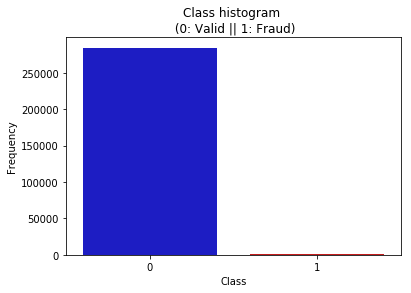

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
print(count_classes)
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=16)
plt.title("Class histogram \n (0: Valid || 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Frequency")

### Data Distribution

Let us explore the distribution to have an idea how data is spread out. The distribution of transaction time is binomial in nature.

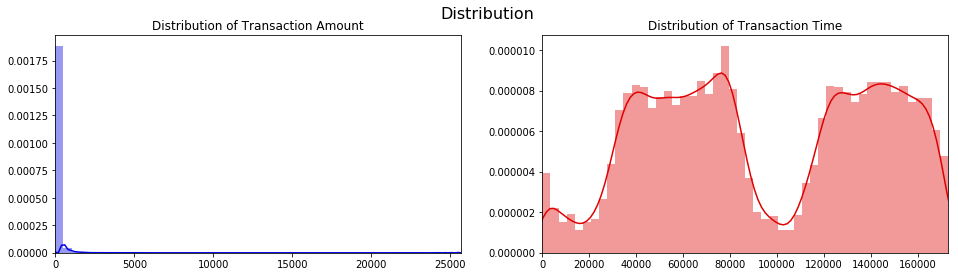

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Distribution', fontsize=16)
amount_val = df['Amount'].values
time_val = df['Time'].values
colors = ["#0101DF", "#DF0101"]
sns.distplot(amount_val, ax=ax[0], color=colors[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

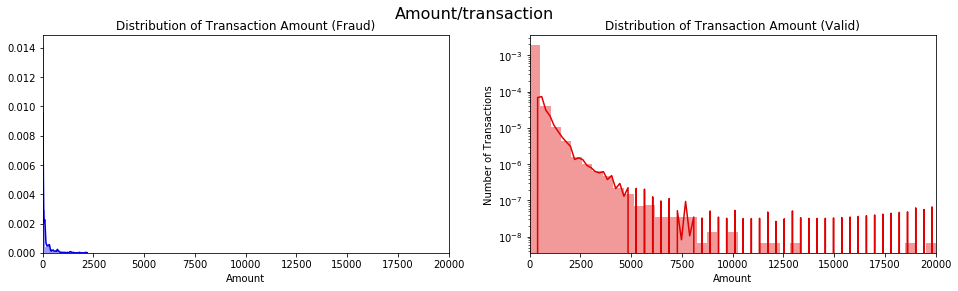

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Amount/transaction', fontsize=16)
colors = ["#0101DF", "#DF0101"]

sns.distplot(df[df['Class']==1].Amount, ax=ax[0], color=colors[0])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
# plt.yscale('log')
ax[0].set_title('Distribution of Transaction Amount (Fraud)')

sns.distplot(df[df['Class']==0].Amount, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Amount (Valid)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

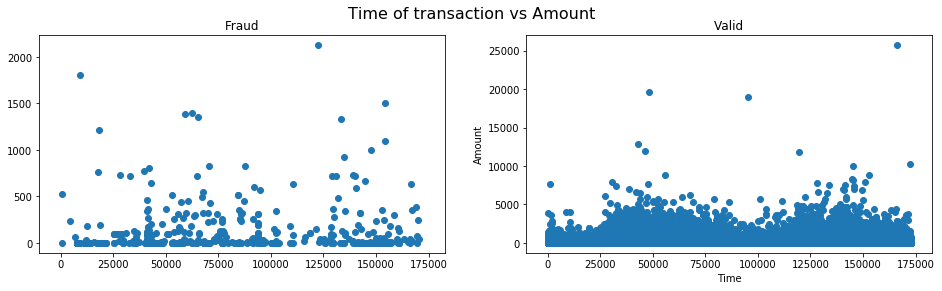

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Time of transaction vs Amount', fontsize=16)
colors = ["#0101DF", "#DF0101"]

ax[0].scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
ax[0].set_title('Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
ax[1].scatter(df[df['Class']==0].Time, df[df['Class']==0].Amount)
ax[1].set_title('Valid')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

<Figure size 432x288 with 0 Axes>

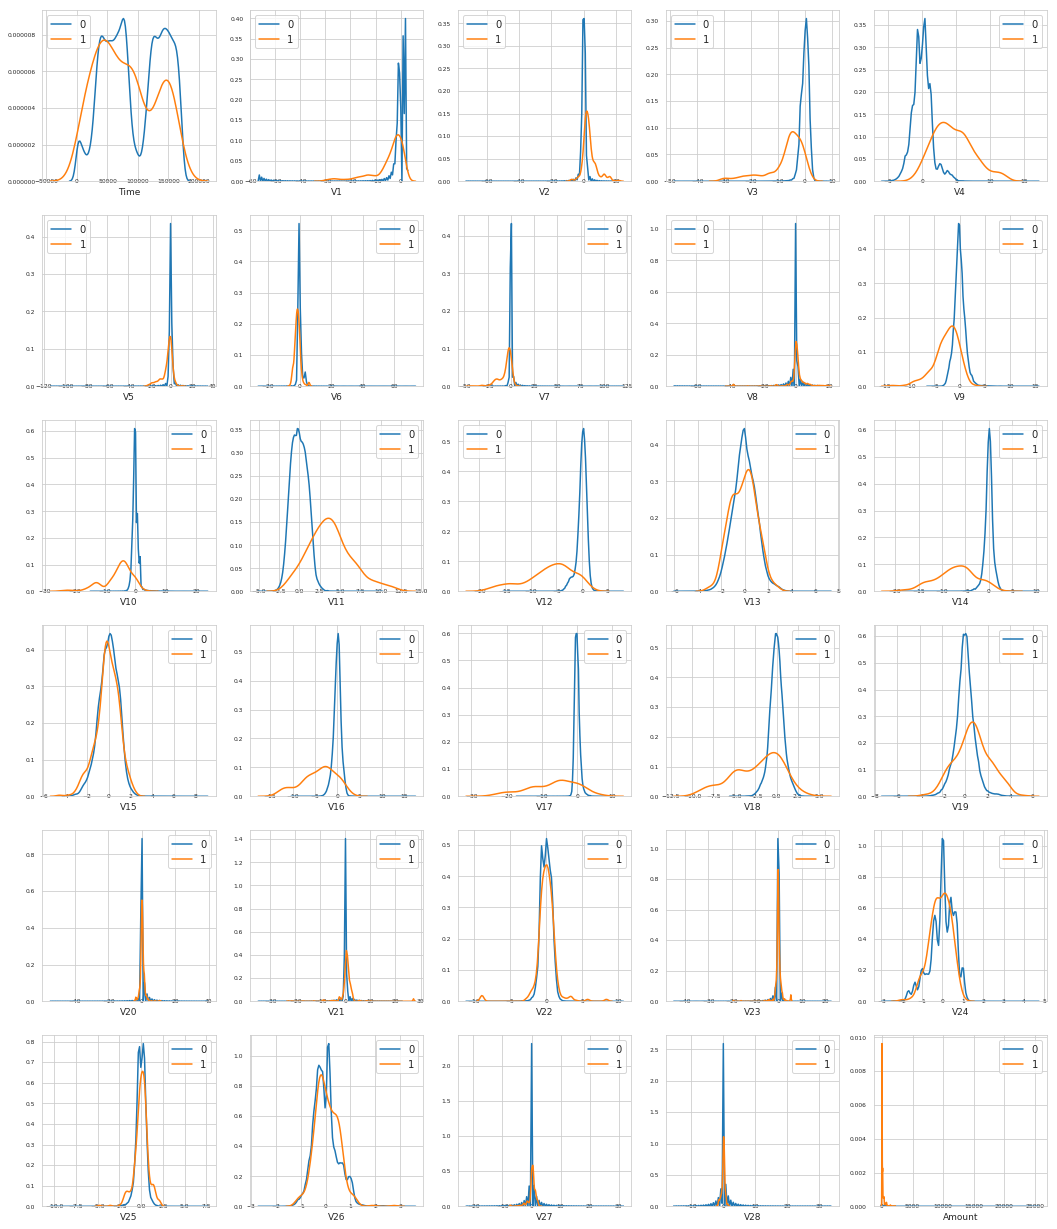

In [14]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,5,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,5,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
    
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
features = df.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features)

>#### Distribution of the mean values per column and ****row in the data

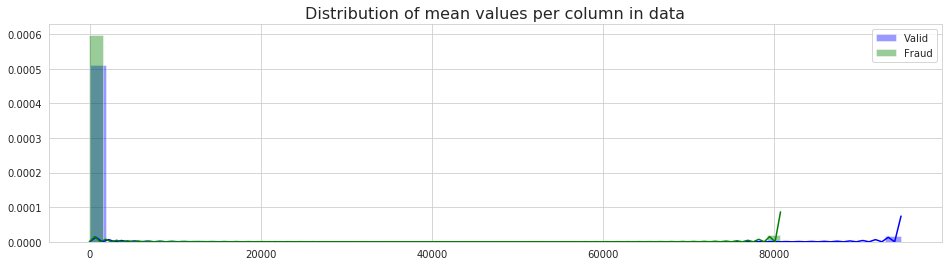

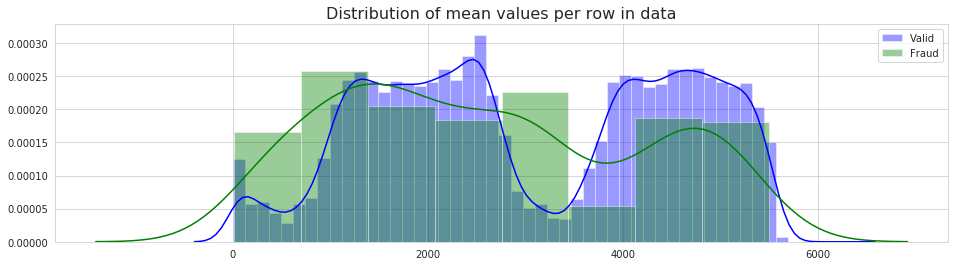

Distribution per row seems meaningless


In [15]:
plt.figure(figsize=(16,4))
plt.title("Distribution of mean values per column in data", fontsize=16)
sns.distplot(t0[features].mean(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].mean(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = df.columns.values
plt.title("Distribution of mean values per row in data", fontsize=16)
sns.distplot(t0[features].mean(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].mean(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

 #### Distribution of skewness per column and row
 >Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

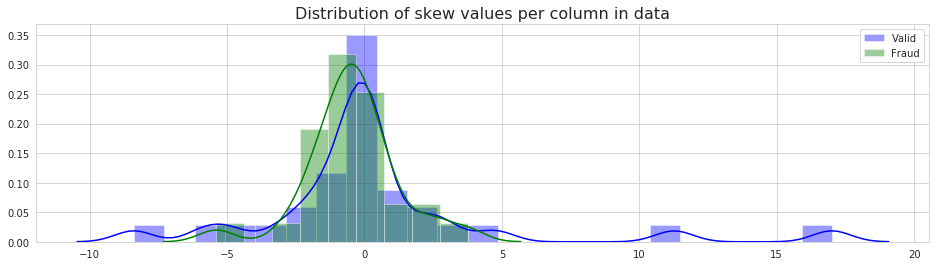

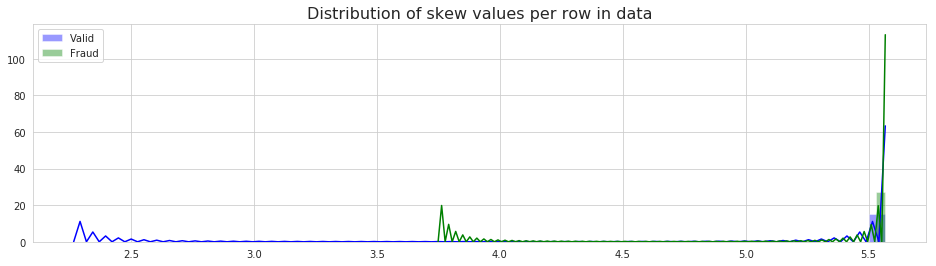

Distribution per row seems meaningless


In [16]:
plt.figure(figsize=(16,4))
plt.title("Distribution of skew values per column in data", fontsize=16)
sns.distplot(t0[features].skew(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].skew(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = df.columns.values
plt.title("Distribution of skew values per row in data", fontsize=16)
sns.distplot(t0[features].skew(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].skew(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

#### Distribution of kurtosis per column and row
 >Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Kurtosis is a measure of the combined weight of a distribution's tails relative to the center of the distribution.

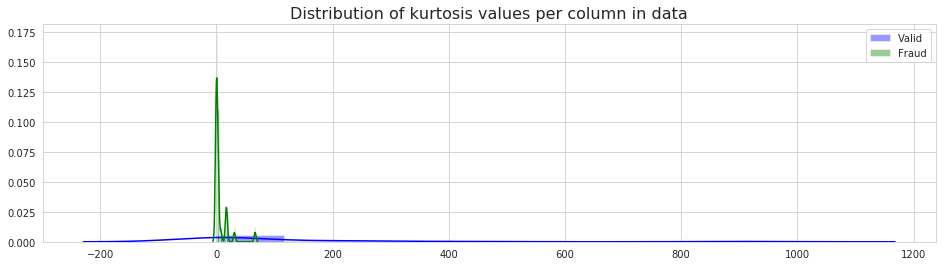

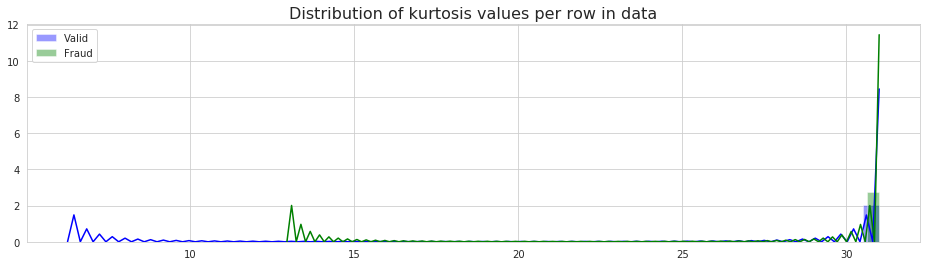

Distribution per row seems meaningless


In [17]:
plt.figure(figsize=(16,4))
plt.title("Distribution of kurtosis values per column in data", fontsize=16)
sns.distplot(t0[features].kurtosis(axis=0),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].kurtosis(axis=0),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
features = df.columns.values
plt.title("Distribution of kurtosis values per row in data", fontsize=16)
sns.distplot(t0[features].kurtosis(axis=1),color="blue",kde=True, label='Valid')
sns.distplot(t1[features].kurtosis(axis=1),color="green",kde=True, label='Fraud')
plt.legend()
plt.show()

print("Distribution per row seems meaningless")

In [18]:
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

fig = go.Scatter(
    x = df[df['Class']==1].Time,
    y = df[df['Class']==1].Amount,
    mode = 'markers'
)

plotly.offline.iplot({
    "data": [fig],
    "layout": go.Layout(title="Scatter Plot of Amount vs Time")
})

#### Correlation Matrix
>We observe that none of the V1 to V28 componenets are correlated and have no correlation to each other

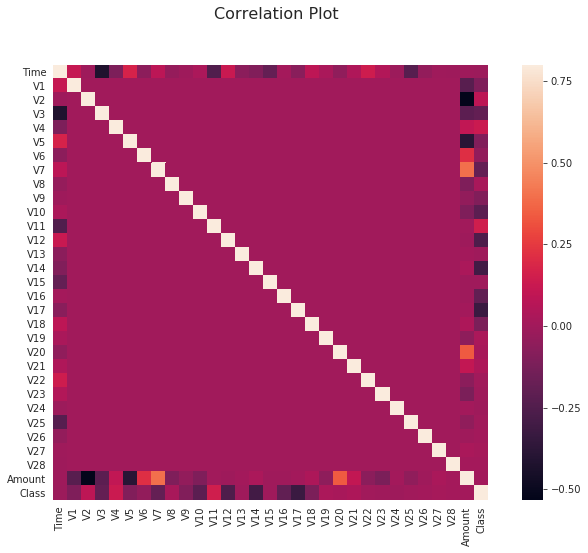

In [19]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,8))
fig.suptitle('Correlation Plot', fontsize=16)
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [20]:
correlations = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
print("Top 5 correlated features")
print(correlations.head(10))
print("\n Least 5 correlated features")
print(correlations.tail(10))

Top 5 correlated features
  level_0 level_1             0
0     V15     V16  1.483021e-10
1     V16     V15  1.483021e-10
2     V17      V6  4.375169e-09
3      V6     V17  4.375169e-09
4     V20     V26  4.917632e-09
5     V26     V20  4.917632e-09
6      V8      V9  5.900829e-09
7      V9      V8  5.900829e-09
8     V13      V1  9.773863e-09
9      V1     V13  9.773863e-09

 Least 5 correlated features
    level_0 level_1         0
920  Amount     V20  0.339399
921     V20  Amount  0.339399
922  Amount      V5  0.386358
923      V5  Amount  0.386358
924      V7  Amount  0.397302
925  Amount      V7  0.397302
926      V3    Time  0.419616
927    Time      V3  0.419616
928      V2  Amount  0.531405
929  Amount      V2  0.531405


## Normalization
> We use RobustScaler as it is less prone to outliers.

In [21]:
rob_scaler = RobustScaler()

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Split into train and test data
> Split data into 80% train and 20% test data.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class',axis=1),df['Class'],test_size=.2,random_state=21)

## Dealing with Imbalanced Data Set

>It is obvious looking at the data that there is a clear majority and minority class in the distribution. Data is heavily skewed. We will counter ways to deal with this issue in the notebook. We will check whether preprocessing techniques work better when there is an overwhelming majority class in the data.

#### Implication of imbalanced classes
>- <b>Overfitting: </b>From the analysis it is clear that the data is heavily imbalanced as most of the transactions are valid. By default our model might predict every scenario to be valid and still have a good accuracy. We do not want that, do we! So let us try to balance the classes.
>- <b>Wrong Correlations: </b>It will be useful to understand how each feature influence the result (Valid or Fraud). Having an imbalance dataframe causes us to miss the true correlations between class and features.

#### There are several ways to approach this classification problem taking into consideration this unbalance. 

>- Collect more data

>- Changing the performance metric:
    - **Confusion matrix**: Table showing correct predictions and types of incorrect predictions.
    - **Precision**: The number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    - **Recall**: The number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    - **F1score**: The weighted average of precision and recall.
    - **Kappa**: The classification accuracy normalized by the imbalance of classes.
    - **ROC curves**: The ratio between sensitivity and specificity.

>ROC curves should be used if there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

>- Resampling the dataset
    - Process the data to have approximately 1:1 ratio between the classes.
    - Over-sampling (add copies of under-represented class)
     - Under-sampling, (delete instances from over-represented class)

#### Oversampling Minority Classes
> Oversampling involves the addition of copies of minority class. It is an optimum choice when we do not have much data.

#### ROC Curve Plot

In [23]:
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(16,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [24]:
def logistic(X,y):
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    y = y.replace([np.inf, -np.inf], np.nan).fillna(0)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    return (prob[:,1],y_test)

ROC plot analysis for imbalanced data


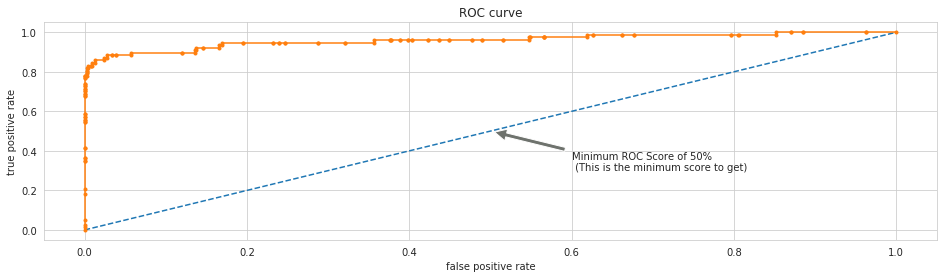

In [25]:
print('ROC plot analysis for imbalanced data')
X=pd.concat([X_train,y_train],axis=1)
probs,y_test=logistic(X.drop('Class', axis=1),X['Class'])
plot_roc(y_test,probs)

1    227462
0    227462
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

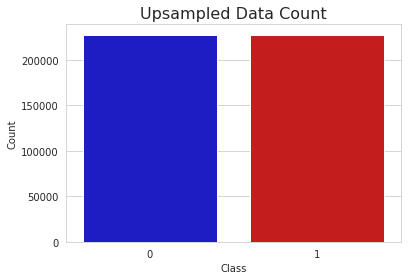

In [26]:
X=pd.concat([X_train,y_train],axis=1)

upsampled_fraud = resample(X[X.Class==1],replace=True, n_samples=len(X[X.Class==0]), random_state=21) 
upsampled = pd.concat([X[X.Class==0], upsampled_fraud])

print(upsampled.Class.value_counts())
colors = ["#0101DF", "#DF0101"]
sns.countplot(upsampled.Class, palette=colors)
plt.title('Upsampled Data Count', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Class')

ROC plot analysis for imbalanced data after Upsampling


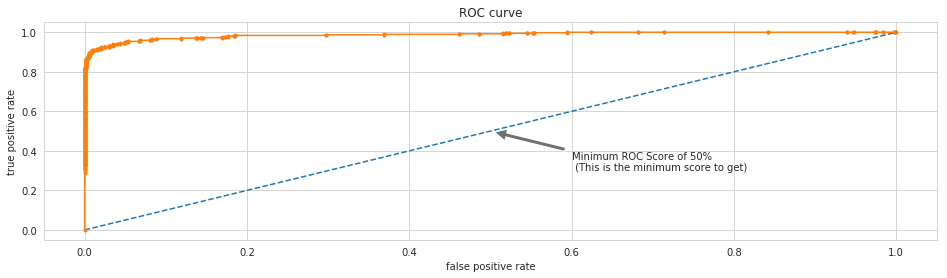

In [27]:
print('ROC plot analysis for imbalanced data after Upsampling')
probs,y_test=logistic(upsampled.drop('Class', axis=1),upsampled['Class'])
plot_roc(y_test,probs)

#### Undersampling Minority Classes
> Oversampling involves the removal of some observations from majority class. It is an optimum choice when we have millions of rows of data. This does enable faster training time but we are throwing away data that could be valuable and undersampling may lead to underfitting and poor generalization.

1    383
0    383
Name: Class, dtype: int64


Text(0.5, 0, 'Class')

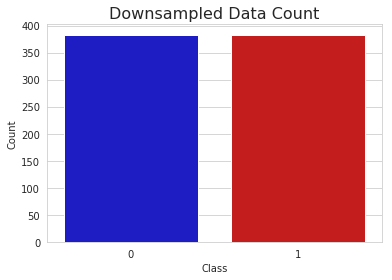

In [28]:
undersampled_valid = resample(X[X.Class==0],replace = False, n_samples = len(X[X.Class==1]),random_state = 21) # reproducible results

downsampled = pd.concat([undersampled_valid, X[X.Class==1]])

print(downsampled.Class.value_counts())
colors = ["#0101DF", "#DF0101"]
sns.countplot(downsampled.Class, palette=colors)
plt.title('Downsampled Data Count', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Class')

ROC plot analysis for imbalanced data after Downsampling


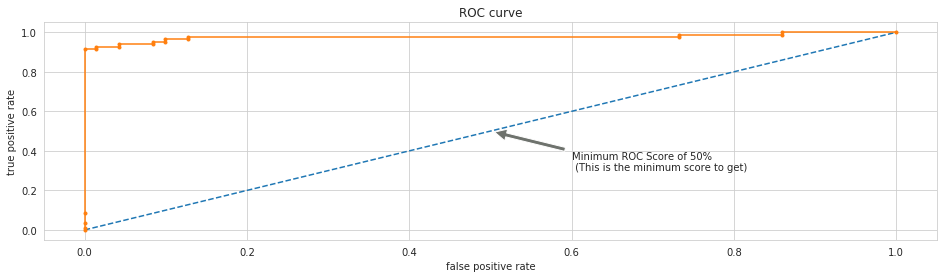

In [29]:
print('ROC plot analysis for imbalanced data after Downsampling')
probs,y_test=logistic(downsampled.drop('Class', axis=1),downsampled['Class'])
plot_roc(y_test,probs)

## Undersampling using Tomek links
> Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [30]:
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X.drop(['Class'], axis=1), X['Class'])

ROC plot analysis for imbalanced data after Downsampling with TomekLinks


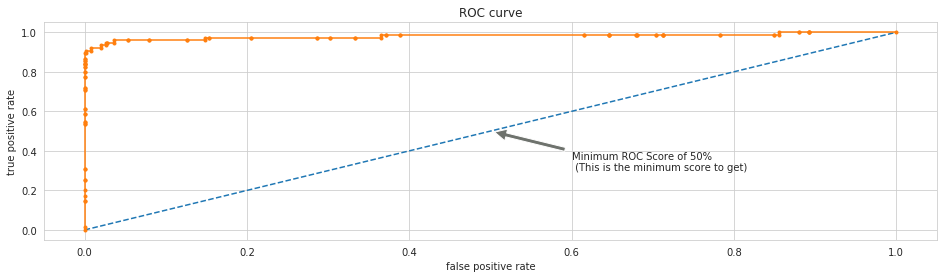

In [31]:
print('ROC plot analysis for imbalanced data after Downsampling with TomekLinks')
probs,y_test=logistic(pd.DataFrame(X_tl),pd.DataFrame(y_tl))
plot_roc(y_test,probs)

## Oversampling using SMOTE
> SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [32]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X.drop(['Class'], axis=1), X['Class'])

ROC plot analysis for imbalanced data after Upsampling with SMOTE


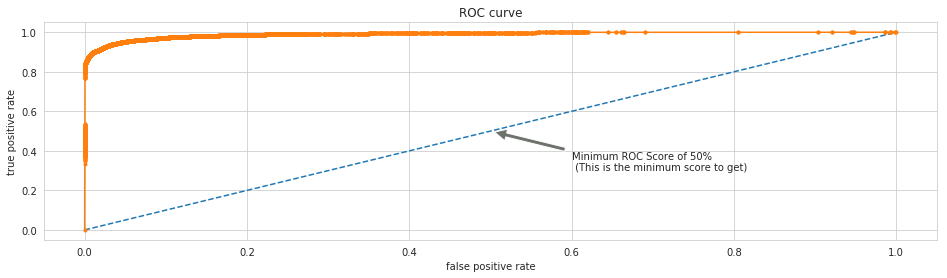

In [33]:
print('ROC plot analysis for imbalanced data after Upsampling with SMOTE')
probs,y_test=logistic(pd.DataFrame(X_sm),pd.DataFrame(y_sm))
plot_roc(y_test,probs)

## Dimensionality Reduction
>TSNE

>PCA

>Truncated SVD

In [34]:
# T-SNE Implementation
t0 = time.time()
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.7e+03 s
PCA took 0.88 s
Truncated SVD took 0.61 s


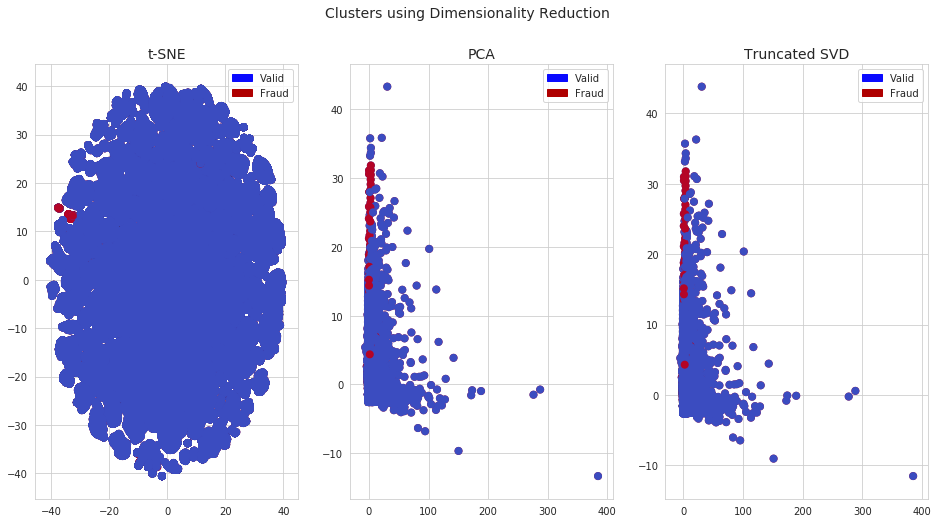

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='Valid')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(X['Class'] == 0), cmap='coolwarm', label='Valid', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(X['Class'] == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(X['Class'] == 0), cmap='coolwarm', label='Valid', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(X['Class'] == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(X['Class'] == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(X['Class'] == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()


## Machine Learning Modelling

There are various machine learning techniques that can be used to deal with anomaly detection. Below listed are some of the common ones.

#### K-nearest neighbor
k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.

#### Relative density of data 
Commonly known as local outlier factor (LOF). This concept is based on a distance metric called reachability distance.

#### K-means 
K-means is a popular clustering algorithm  and is based on the assumption that data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

#### Support Vector Machine

SVM is typically associated with supervised learning, but there are extensions (OneClassCVM) can be used to identify anomalies as an unsupervised problems. SVM learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.

#### Isolation Forest Anomaly Detection Algorithm

#### Density-Based Anomaly Detection (Local Outlier Factor)Algorithm

#### Support Vector Machine Anomaly Detection Algorithm 


## Primary Models
> Let us prepare a set of primary algorithms before venturing to more complex ones!

In [36]:
# Let us convert dataframes into arrays
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_train = X_train.values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.values
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train = y_train.values
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(0)
y_test = y_test.values

In [37]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

#### Check for Overfitting

In [38]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.91%


In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1)) = plt.subplots(1,1, figsize=(16,8), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

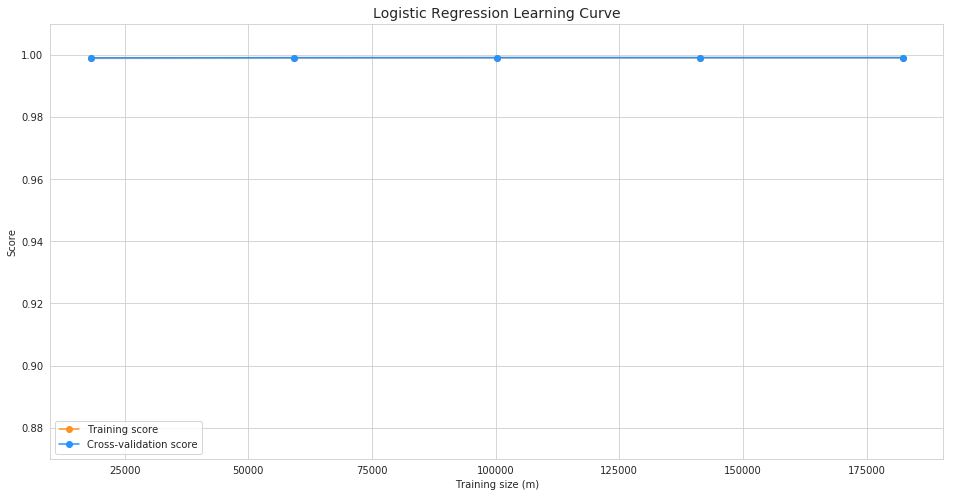

In [40]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=21)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [41]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

In [42]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

Logistic Regression:  0.9769991592776992


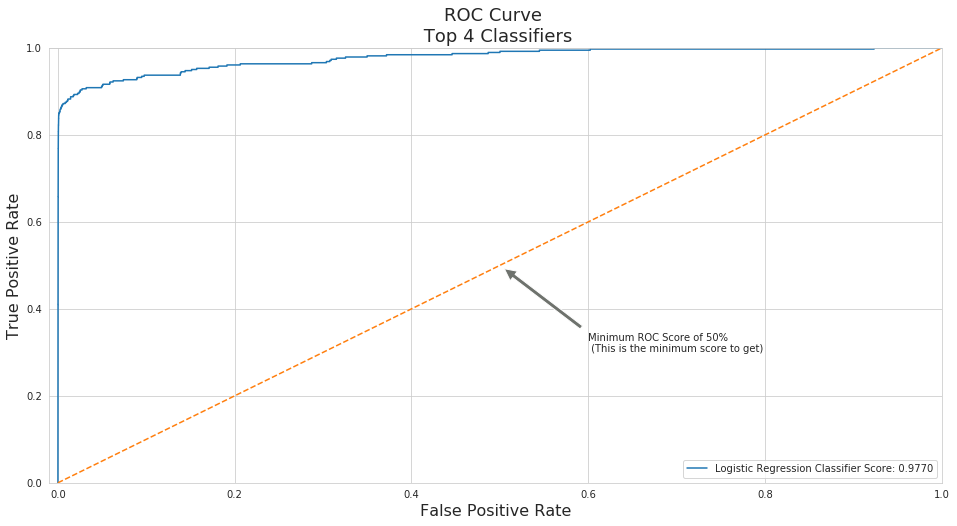

In [43]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

## Anomaly Detection Algorithms

## Model Prediction

#### 1. Isolation Forest Algorithm: 
> Isolation Forest ia an anomaly detection algorithm and it explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

> In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.

> As with other outlier detection methods, an anomaly score is required for decision making.Each observation is given an anomaly score and the following decision can be made on its basis:
> * A score close to 1 indicates anomalies
> * Score much smaller than 0.5 indicates normal observations
> * If all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies

>Similarly to Random Forest, it is built on an ensemble of binary (isolation) trees

> [*https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e*]

#### 2. Local Outlier Factor(LOF) Algorithm
>Local Outlier Factor algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors. Local Outlier Factor (LOF) is a score that tells how likely a certain data point is an outlier/anomaly.

>The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

#### 3. One Class SVM
> One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set. It is not a 2-class problem rather it is (1+x)-class classification. Also, its an unsupervised algorithm that learns  decision boundary for  novelty detection.

> A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data, in our case the negative examples. It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as, you guessed it, outliers.

In [44]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [45]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()

    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_train,y_pred))
    print("Classification Report :")
    print(classification_report(y_train,y_pred))
    print('\n')

Isolation Forest: 22476
Accuracy Score :
0.9013539906515394
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    227462
           1       0.02      0.90      0.03       383

    accuracy                           0.90    227845
   macro avg       0.51      0.90      0.49    227845
weighted avg       1.00      0.90      0.95    227845



Local Outlier Factor: 23032
Accuracy Score :
0.8989137352147293
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    227462
           1       0.00      0.18      0.01       383

    accuracy                           0.90    227845
   macro avg       0.50      0.54      0.48    227845
weighted avg       1.00      0.90      0.95    227845



Support Vector Machine: 11329
Accuracy Score :
0.9502776010006803
Classification Report :
              precision    recall  f1-score   support

           0       1.00  